In [23]:
import pandas as pd

df = pd.read_csv('/Users/Kadibhai/Downloads/Thinkful Data Files/ibm-hr-analytics-employee-attrition-performance.zip')
pd.set_option('display.max_columns', 500)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [47]:
#Convert Attrition and BusinessTravel variables from string to numeric

d={'No':0, 'Yes':1}
df['Attrition'] = df['Attrition'].map(d).fillna(df['Attrition'])
d={'Travel_Rarely':1, 'Travel_Frequently':2, 'Non-Travel':0}
df['BusinessTravel'] = df['BusinessTravel'].map(d).fillna(df['BusinessTravel'])
d={'No':0, 'Yes':1}
df['OverTime'] = df['OverTime'].map(d).fillna(df['OverTime'])
pd.set_option('display.max_columns', 200)
df.head()

Y = df['Attrition']
x = df[['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel',
        'JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike','RelationshipSatisfaction',
        'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

cat_x = pd.get_dummies(df[['BusinessTravel','Department','EducationField','MaritalStatus','Over18','Gender','OverTime','JobRole']],drop_first=True)
X = pd.concat([x,cat_x],axis=1)

In [65]:
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=5,
)
decision_tree.fit(X, Y)

cross_val_score(decision_tree, X, Y, cv=10).mean()

0.83332867393532761

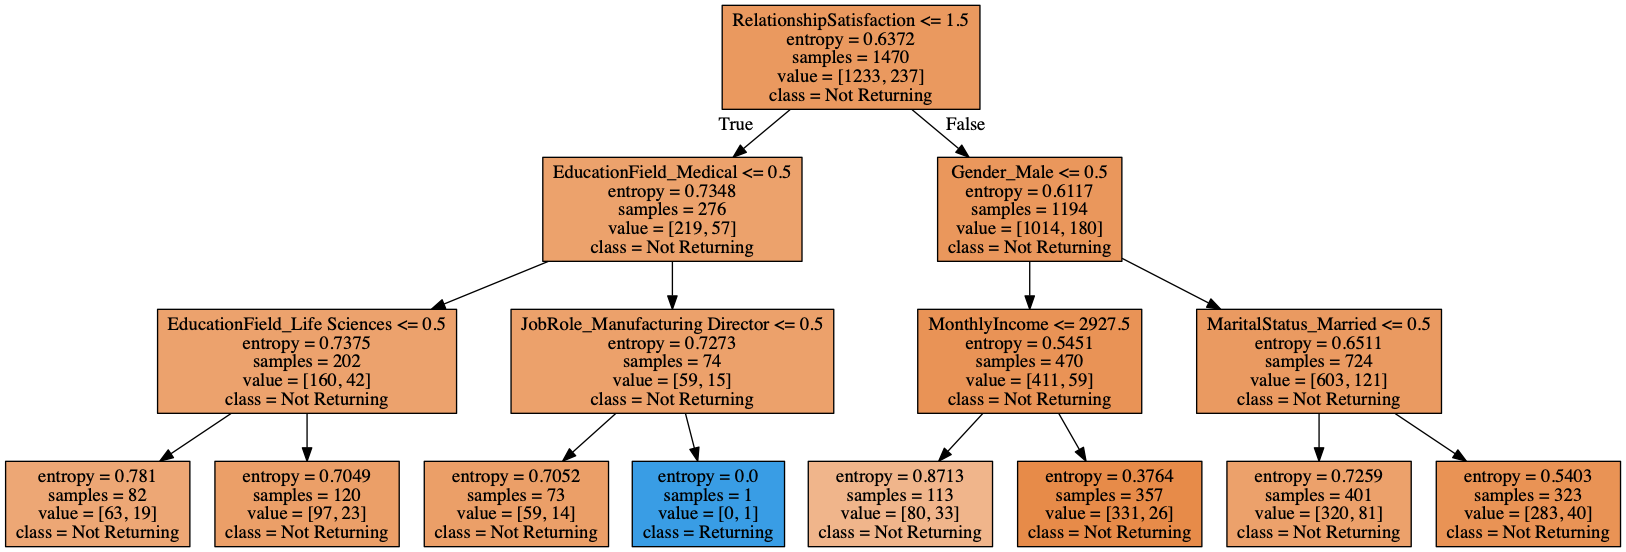

In [56]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [55]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

cross_val_score(rfc, X, Y, cv=10).mean()


0.85037287777013792

We can see how the random forest perfoms marginally better than the decision tree. 